In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import pandas as pd

In [44]:
# Create color maps
cmap_light = ListedColormap(['#FFF0F5', '#CCFFCC', '#CCFFFF']) #给不同区域赋以颜色，（红，绿，蓝）
cmap_bold = ListedColormap(['#FF6600', '#99FF33', '#33CCFF'])#给不同属性的点赋以颜色

In [115]:
#生成样本数据（两个特征值的数据集）
# 之所以生成2个特征值是因为需要在二维平面上可视化展示预测结果
from sklearn.datasets.samples_generator import make_classification
# x为样本特征，y为样本类别输出，共203个样本，每个样本2个特征，输出有3个类别，没有冗余特征，每个类别一个簇
x, y = make_classification(n_samples=203, n_features=2, n_redundant=0, n_clusters_per_class=1, n_classes=3)
for i in range (len(x)):
    x[i] += 5
#tx,ty是待测的3个测试样本及对应正确类别
tx,ty = x[-3:],y[-3:]
#x,y是已知的200个训练样本及对应类别
x,y = x[:-3],y[:-3]

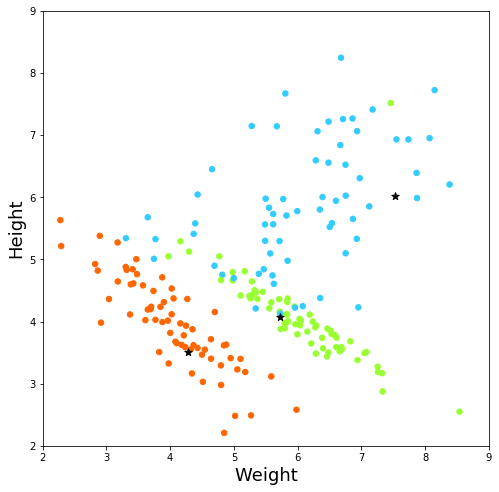

In [168]:
#画出训练集和测试集
plt.figure(figsize=(8,8))
#设置坐标轴范围
plt.xlim((2, 9))
plt.ylim((2, 9))
plt.xlabel("Weight",fontsize = 18)
plt.ylabel("Height",fontsize = 18)

#画出训练集
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y, cmap=cmap_bold, s=30)
#画出测试集
plt.scatter(tx[:, 0], tx[:, 1], marker='*',color='black', s=60)

plt.savefig("fig_rabbit.png", dpi=300)
plt.show()

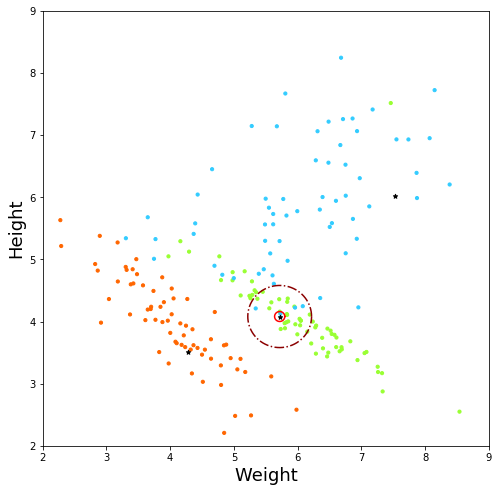

In [185]:
#画出训练集和测试集，并标注重点
plt.figure(figsize=(8,8))
#设置坐标轴范围
plt.xlim((2, 9))
plt.ylim((2, 9))
plt.xlabel("Weight",fontsize = 18)
plt.ylabel("Height",fontsize = 18)

#画出训练集
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y, cmap=cmap_bold, s=10)
#画出测试集
plt.scatter(tx[:, 0], tx[:, 1], marker='*',color='black', s=20)

# #圈出测试样本重点
# r = 0.5
# for i in range(len(tx)):
#     a, b = (tx[i][0],tx[i][1])
#     theta = np.arange(0, 2*np.pi, 0.01)
#     cx = a + r * np.cos(theta)
#     cy = b + r * np.sin(theta)
#     plt.plot(cx, cy, color='red',linewidth=2)

#圈出测试样本重点
rList = [0.08,0.5]
colorList = ['#FF0000', '#8B0000']
styleList = ['-', '-.']
for i in range(len(rList)):
    r = rList[i]
    a, b = (tx[0][0],tx[0][1])
    theta = np.arange(0, 2*np.pi, 0.01)
    cx = a + r * np.cos(theta)
    cy = b + r * np.sin(theta)
    plt.plot(cx, cy, color=colorList[i],linestyle=styleList[i],linewidth=1.5)

plt.savefig("fig_rabbitMaker.png", dpi=600)
plt.show()

In [152]:
#距离函数
#欧几里得距离
def euclideanDistance(data1, data2):
    distance = 0
    for x in range(len(data1)):
        distance += np.square(data1[x]-data2[x])
    return np.sqrt(distance)


In [153]:
#KNN模型
#对每一个测试实例进行分类
def KNNClassifySignal(labelData,labelTarget,testInstance,k):
    # labelData 是已经标记分类的数据集的数据
    # labelTarget 是已经标记分类的数据集的分类
    # testInstance 是待预测数据集的数据集的数据
    distances = dict()
    #对训练集每条数据进行迭代
    for i in range(len(labelData)):
        trainInstance = labelData[i]
        #1. 计算测试数据与训练集中每一条数据的距离(欧式距离)
        distances[i] = euclideanDistance(testInstance, trainInstance)

    #2. 对距离进行升序排列
    sorted_d = sorted(distances.items(), key=lambda k:k[1])

    #3. 对排列结果选择前K个值,得到出现次数最多的类
    neighbors = []
    classVotes = dict()
    for i in range(k):
        neighbor = sorted_d[i][0]
        neiclass = labelTarget[neighbor]
        neighbors.append(neighbor)
        if neiclass in classVotes:
            classVotes[neiclass] += 1
        else:
            classVotes[neiclass] = 1

    #4. 返回测试数据的预测类别
    sortedVotes = sorted(classVotes.items(), key=lambda k:k[1], reverse=True)
    return sortedVotes[0][0]

In [154]:
#KNN模型
#对测试集进行分类
#对每个测试实例调用KNNClassifySignal
def KNNClassify(x_train,y_train,x_test,k):  #数据集包含分类属性
    #x_train 是已经标记分类的数据集的数据
    #y_train 是已经标记分类的数据集的分类
    #x_test 是待预测数据集的数据集的数据
    #y_test 是待预测数据集的数据集的正确分类
    #y_pred 是待预测数据集的数据集的预测分类
    y_pred = []
    for testInstance in x_test: #对x_test的每行数据进行遍历
        predclass = KNNClassifySignal(x_train,y_train,testInstance,k)
        y_pred.append(predclass)
    return y_pred

In [ ]:
# 对整个测试范围的数据进行预测以画出KNN分类的边界
h = .12 # 网格中的步长（规定稍长一点，要不然需要运行很久）
#确认边界，再生成随机数据来做测试集，然后作预测
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h)) #生成网格型二维数据对
x_test = np.c_[xx.ravel(), yy.ravel()]
ZList = []
#设置不同的k的取值，来展示k取值对分类效果的影响 
kList = [1,15,30,60,120,200]
for k in kList:
    Z = KNNClassify(x,y,x_test,k)
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)
    ZList.append(Z)

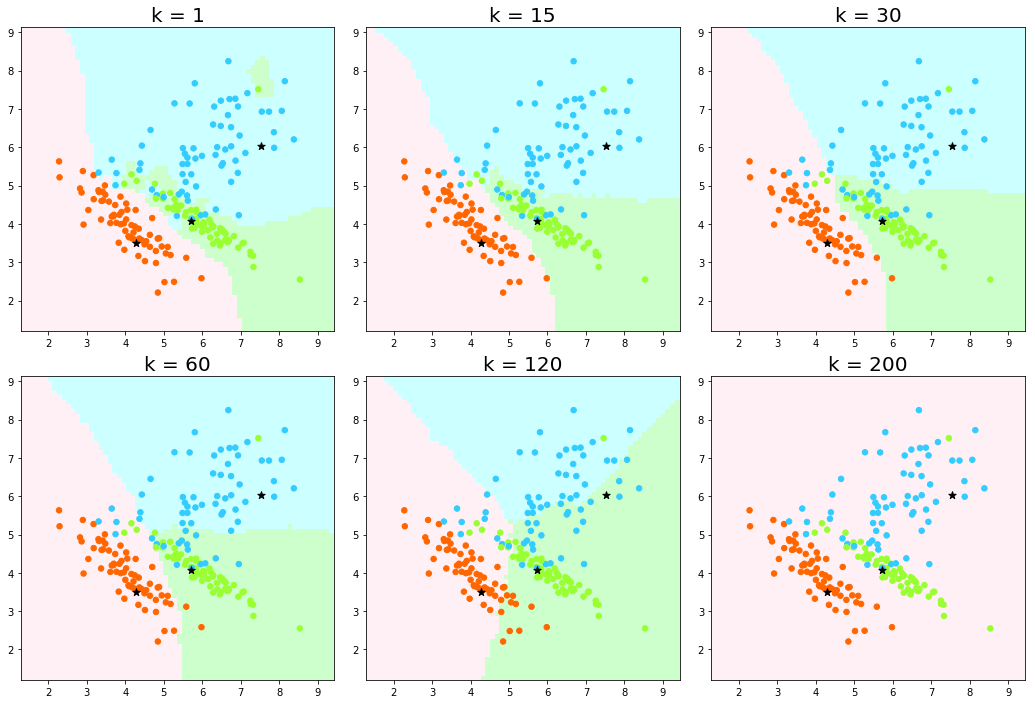

In [173]:
# 画出KNN分类的边界
plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=0.15, wspace=0.1)
for i in range(6):
    ax = plt.subplot(231+i)
    ax.set_title('k = ' + str(kList[i]), fontsize = 20)
    #将预测的结果在平面坐标中画出其类别区域
    plt.pcolormesh(xx, yy, ZList[i], cmap=cmap_light)
    # 画出所有的训练集数据
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, s=30)
    #画出测试数据集数据
    plt.scatter(tx[:, 0], tx[:, 1], marker='*',color='black', s=60)

plt.savefig("fig_KNNDiffK.png", dpi=1500)

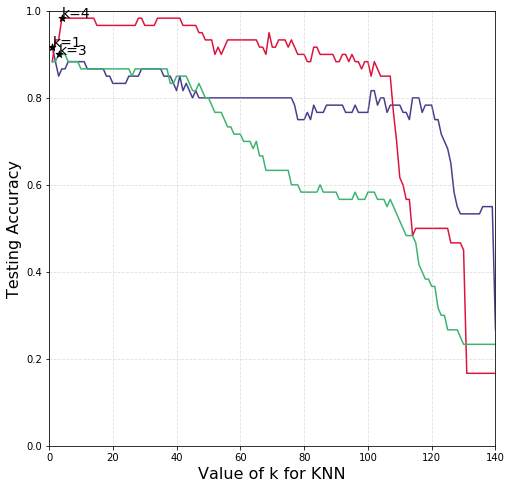

In [261]:
# 采用简单的交叉验证选取K值，并绘制不同的训练集/测试集划分下K值和准确率的关系
from sklearn.model_selection import train_test_split

# 绘制K值和准确率的关系
plt.figure(figsize=(8,8))
plt.xlim((0, 140))
plt.ylim((0, 1))
plt.xlabel('Value of k for KNN',fontsize = 16)
plt.ylabel('Testing Accuracy',fontsize = 16)
colorList = ['#483D8B', '#DC143C', '#3CB371']
#styleList = [':', '-.', '-']

repeatTimes = 3
for i in range(repeatTimes):
    # 将数据集随机分为训练集和测试集
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    # 尝试 K 从1到140，记录测试准确率
    k_range = list(range(1, 141))
    scores,bestscore,bestk = [],0,0
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        score = knn.score(x_test, y_test)
        scores.append(score)
        if score > bestscore:
            bestscore,bestk = score,k
    #plt.plot(k_range, scores)
    plt.plot(k_range, scores, color=colorList[i],linestyle='-',linewidth=1.5, zorder=1)
    plt.scatter(bestk, bestscore, marker='*',color='black', s=50, zorder=2)
    plt.text(bestk,bestscore,('k='+str(bestk)),color='black',fontsize=14, zorder=2)
    
plt.grid(linestyle='--', alpha=0.4)
plt.savefig("fig_SimpleCrossValidation-n.png", dpi=600)

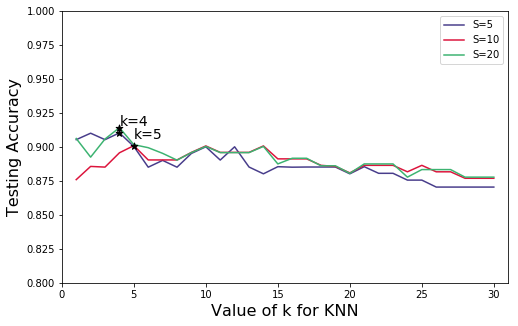

In [289]:
# 采用S折交叉验证选取K值，并绘制不同的S折下K值和准确率的关系
from sklearn.model_selection import cross_val_score

# 绘制K值和准确率的关系
plt.figure(figsize=(8,5))
plt.xlim((0, 31))
plt.ylim((0.8, 1))
plt.xlabel('Value of k for KNN',fontsize = 16)
plt.ylabel('Testing Accuracy',fontsize = 16)
colorList = ['#483D8B', '#DC143C', '#3CB371', '#FFA500']

SList = [5,10,20]
for i in range(len(SList)):
    k_range = list(range(1, 31))  # K的范围[1, 30]
    k_scores,bestscore,bestk = [],0,0
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, x, y, cv=SList[i], scoring='accuracy')
        score = scores.mean()
        k_scores.append(score)
        if score > bestscore:
            bestscore,bestk = score,k
    
    #plt.plot(k_range, k_scores)   
    plt.plot(k_range, k_scores, color=colorList[i],linestyle='-',linewidth=1.5, zorder=1,label=('S='+str(SList[i])))
    plt.scatter(bestk, bestscore, marker='*',color='black', s=50, zorder=2)
    if i==2:
        continue
        #plt.text(bestk,bestscore,('k='+str(bestk)),color='black',fontsize=14, zorder=2)
    else:
        plt.text(bestk,bestscore+0.005,('k='+str(bestk)),color='black',fontsize=14, zorder=2)
    
plt.legend()
plt.savefig("fig_S-foldCrossValidation.png", dpi=600)

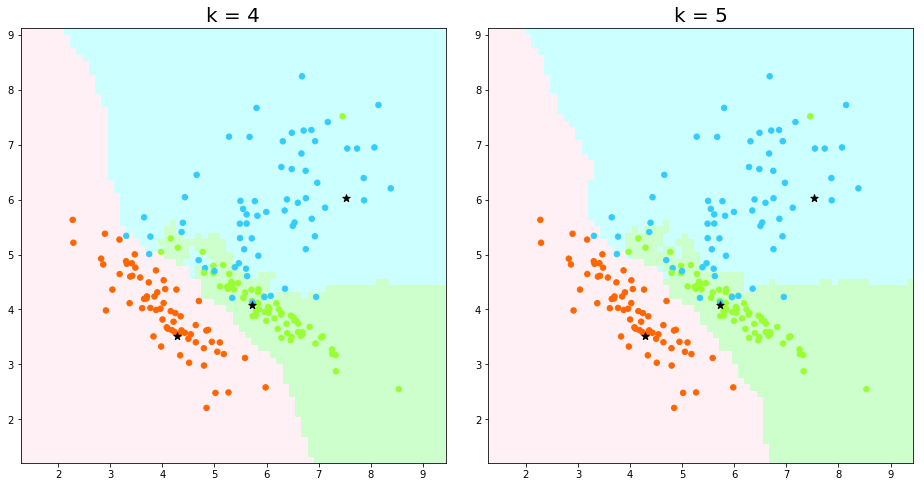

In [291]:
# 最终结果：采用欧式距离，取k=4和k=5进行分类
# 对整个测试范围的数据进行预测以画出KNN分类的边界
h = .12 # 网格中的步长（规定稍长一点，要不然需要运行很久）
#确认边界，再生成随机数据来做测试集，然后作预测
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h)) #生成网格型二维数据对
x_test = np.c_[xx.ravel(), yy.ravel()]
ZList = []
kList = [4,5]
for k in kList:
    Z = KNNClassify(x,y,x_test,k)
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)
    ZList.append(Z)
# 画出KNN分类的边界
plt.figure(figsize=(16, 8))
plt.subplots_adjust(hspace=0.15, wspace=0.1)
for i in range(2):
    ax = plt.subplot(121+i)
    ax.set_title('k = ' + str(kList[i]), fontsize = 20)
    #将预测的结果在平面坐标中画出其类别区域
    plt.pcolormesh(xx, yy, ZList[i], cmap=cmap_light)
    # 画出所有的训练集数据
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, s=30)
    #画出测试数据集数据
    plt.scatter(tx[:, 0], tx[:, 1], marker='*',color='black', s=60)

plt.savefig("fig_4NNand5NN.png", dpi=600)